In [310]:
import numpy as np 
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostClassifier,AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score,classification_report,confusion_matrix

In [92]:
data=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/boston_house_rent.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [93]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


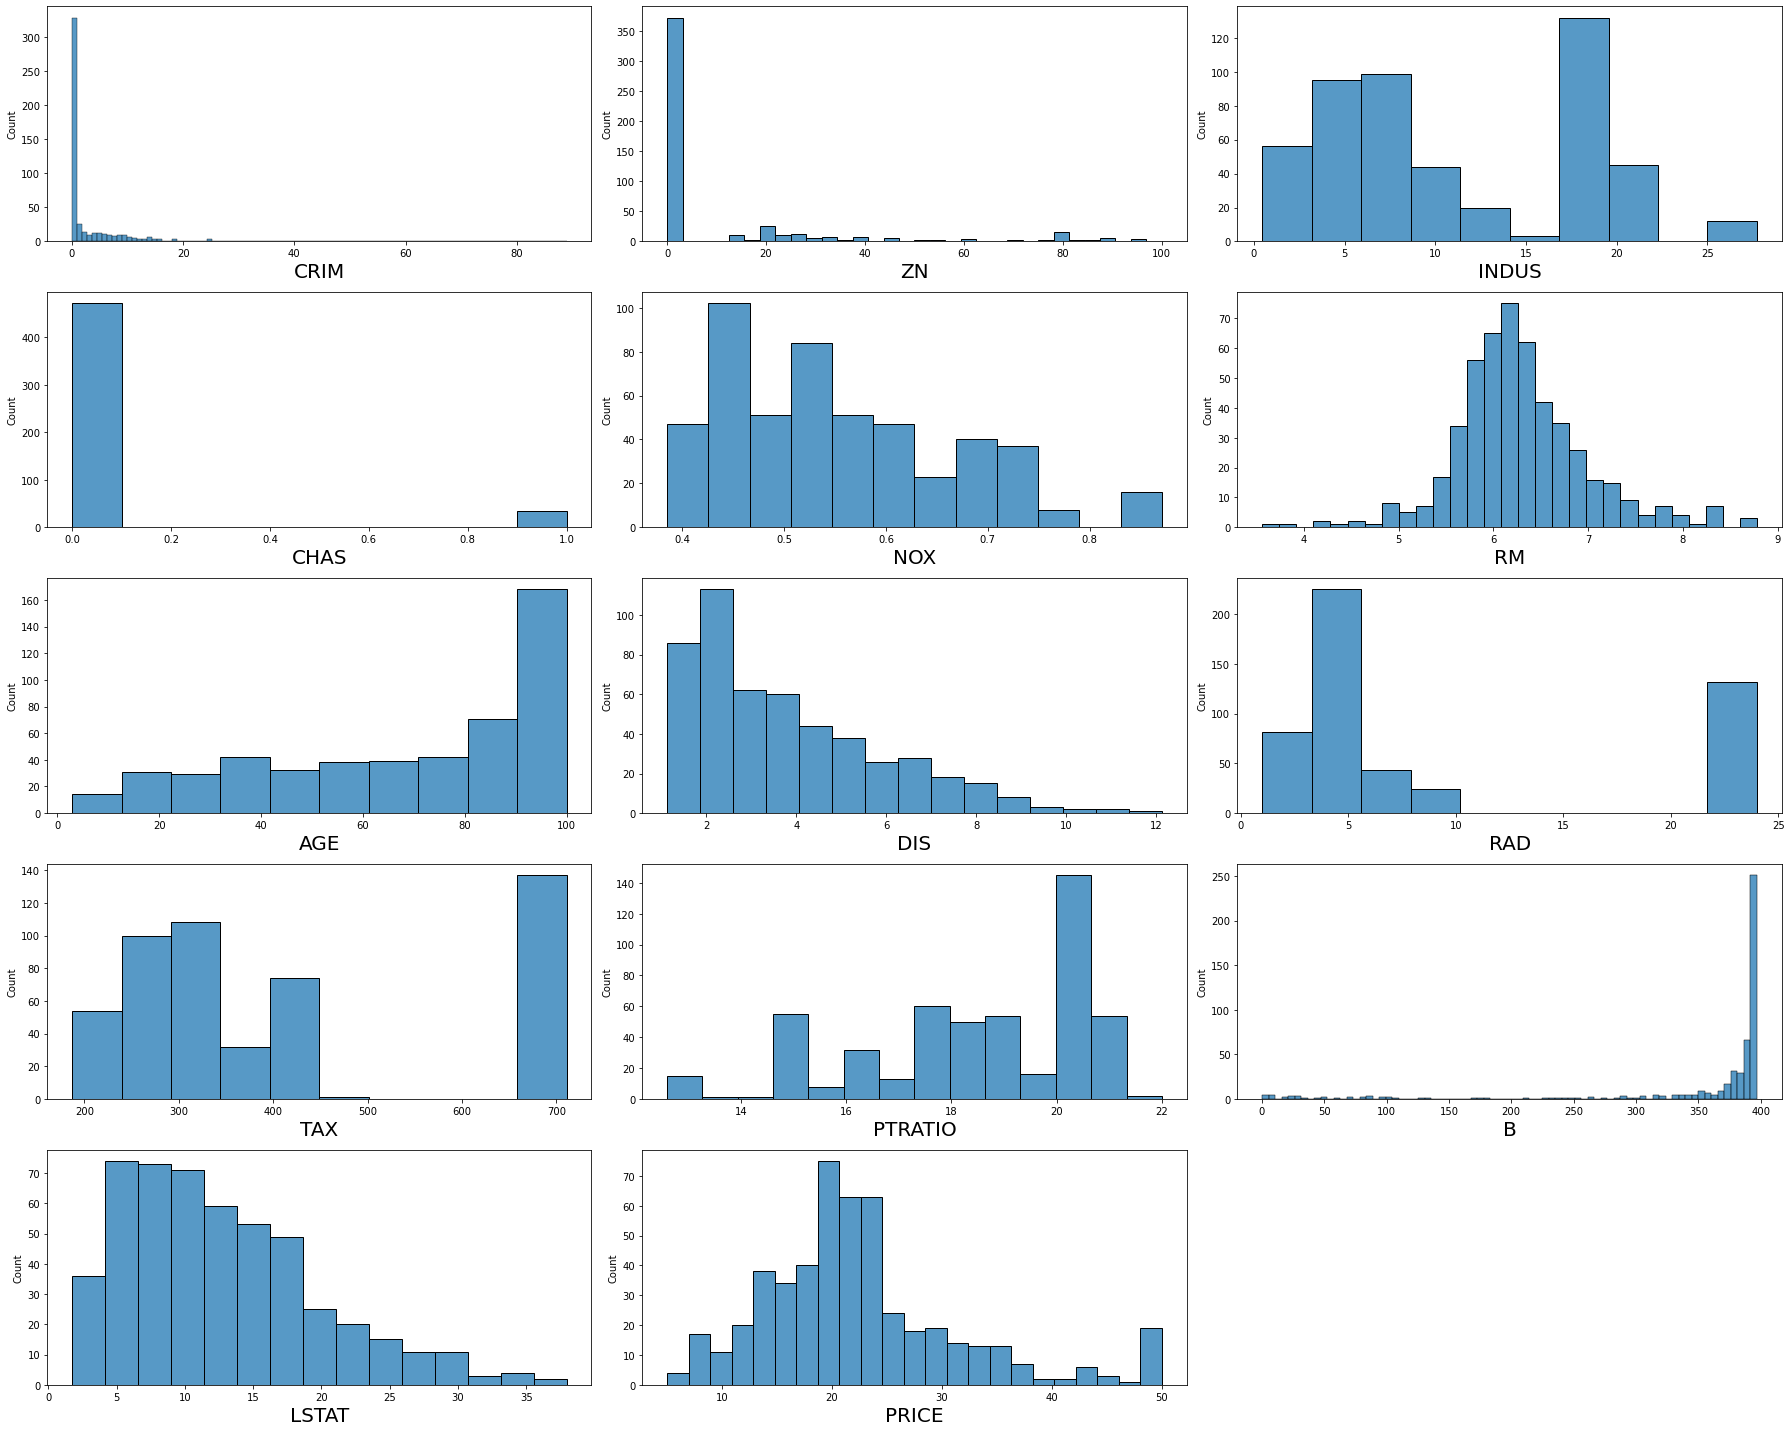

In [96]:

plt.figure(figsize=(25,20))
numb=1

for columns in data:
    if numb<=15:
        ax= plt.subplot(5,3,numb)
        sb.histplot(data[columns])
        plt.xlabel(columns,fontsize=20)
        
    numb+=1
plt.tight_layout()


import warnings
warnings.filterwarnings('ignore')

In [103]:
x=data.drop(columns='PRICE',axis=1)
y=data['PRICE']
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [105]:
ada=AdaBoostRegressor()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=101)


In [123]:
ada.fit(x_train,y_train)
y_pred=ada.predict(x_train)
r2_score(y_train,y_pred)

0.9027577624853304

In [124]:
y_predict=ada.predict(x_test)


In [125]:
print(r2_score(y_test,y_predict))
print(mean_absolute_error(y_test,y_predict))
print(np.sqrt(mean_absolute_error(y_test,y_predict)))
print(mean_squared_error(y_test,y_predict))

0.8230052915402852
3.3317647371758667
1.8253122300515785
18.518461542283266


## HYPERPARAMETER TUNING

In [159]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [205]:
### this the randomized searchcv

parameter={'n_estimators':range(20,200,20),'learning_rate':[0.02,0.04,0.06]}
rs=RandomizedSearchCV(AdaBoostRegressor(),cv=5, param_distributions=parameter)
rs.fit(x_train,y_train)
rs.best_estimator_

AdaBoostRegressor(learning_rate=0.04, n_estimators=160)

In [206]:
adr=AdaBoostRegressor(n_estimators=160,learning_rate=0.04)

In [207]:
adr.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=0.04, n_estimators=160)

In [208]:
y_predi=adr.predict(x_test)


In [213]:
r2_score(y_test,y_predi)

0.831839363847012

In [216]:
import pickle
filename='ada_bostan_housing rent'
pickle.dump(adr,open(filename,'wb'))

In [217]:
pickle.load(open(filename,'rb'))

AdaBoostRegressor(learning_rate=0.04, n_estimators=160)

In [195]:
parameter={'n_estimators':[20,30,40,50],'learning_rate':[0.25,0.35]}
rd=GridSearchCV(AdaBoostRegressor(),cv=5,param_grid=parameter,n_jobs=-1)

rd.fit(x_train,y_train)
rd.best_estimator_

AdaBoostRegressor(learning_rate=0.35)

In [199]:
ads=AdaBoostRegressor(learning_rate=0.35)
ads.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=0.35)

In [218]:
y_predictt= ads.predict(x_test)
r2_score(y_test,y_predictt)

0.8296923201958963

## NOW WE ARE USING THE DECISION TREE

In [221]:
corr=data.corr().abs()


<AxesSubplot:>

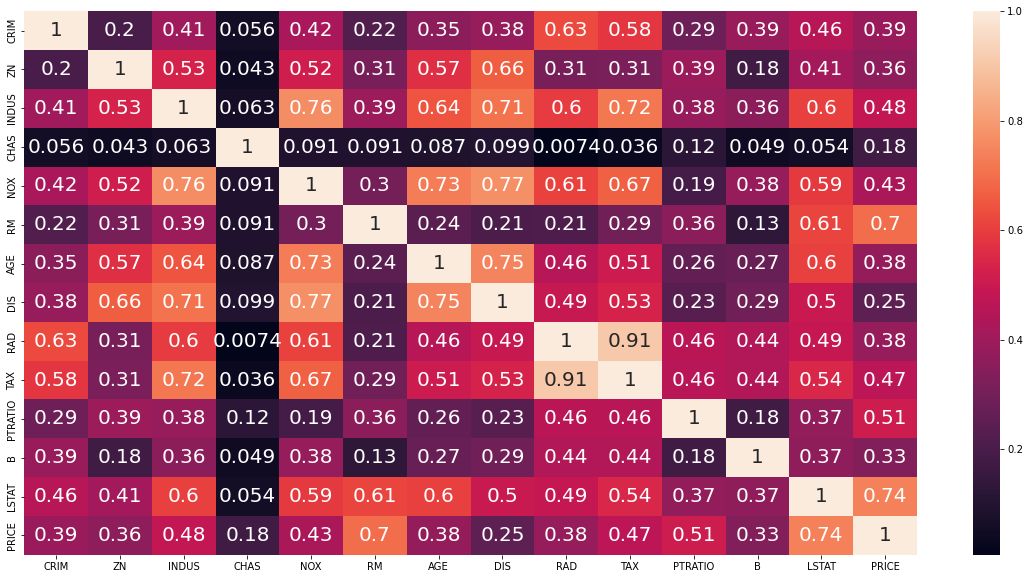

In [231]:
plt.figure(figsize=(20,10))
sb.heatmap(data=corr,annot=True,annot_kws={'size':20})

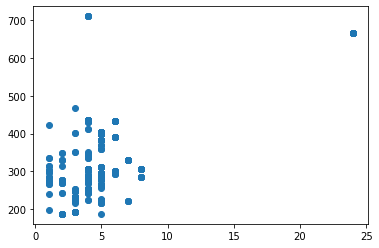

In [235]:
plt.scatter(x='RAD',y='TAX',data=data)


In [237]:
### no multicolinerity problem 

In [240]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=101)

In [244]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [247]:
y_dt_predict=dt.predict(x_test)

In [249]:
r2_score(y_test,y_dt_predict)

0.8240419391587542

In [270]:
para= {
        'max_depth': range(10, 15),                 
       'max_leaf_nodes': range(2, 4),
       'min_samples_leaf': range(2, 10),
        'min_samples_split': range(3, 10)}
    


# here we are using the grid search cv 

In [271]:
gd=GridSearchCV(DecisionTreeRegressor(),cv=5,param_grid=para,n_jobs=-1)

In [274]:
gd.fit(x_train,y_train)
gd.best_estimator_

DecisionTreeRegressor(max_depth=13, max_leaf_nodes=3, min_samples_leaf=2,
                      min_samples_split=9)

In [278]:
dt=DecisionTreeRegressor(max_depth=13, max_leaf_nodes=3, min_samples_leaf=2,
                      min_samples_split=9)
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=13, max_leaf_nodes=3, min_samples_leaf=2,
                      min_samples_split=9)

In [281]:
pred=dt.predict(x_test)
r2_score(y_test,pred)

0.6216065515995596

# here we are using randomized searchcv

In [303]:
parameter={'max_depth': range(10, 15),                 
       'max_leaf_nodes': range(2, 4),
       'min_samples_leaf': range(2, 10),
        'min_samples_split': range(3, 10)}

rd= RandomizedSearchCV(DecisionTreeRegressor(),cv=5,param_distributions=parameter,n_jobs=-1)
rd.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': range(10, 15),
                                        'max_leaf_nodes': range(2, 4),
                                        'min_samples_leaf': range(2, 10),
                                        'min_samples_split': range(3, 10)})

In [304]:
rd.best_estimator_

DecisionTreeRegressor(max_depth=14, max_leaf_nodes=3, min_samples_leaf=6,
                      min_samples_split=3)

In [305]:
dt=DecisionTreeRegressor(max_depth=14, max_leaf_nodes=3, min_samples_leaf=6,
                      min_samples_split=3)

In [306]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=14, max_leaf_nodes=3, min_samples_leaf=6,
                      min_samples_split=3)

In [309]:
y_dt_pre=dt.predict(x_test)
r2_score(y_test,y_dt_pre)

0.6216065515995597

# KNN 


In [313]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [315]:
y__k_pred=knn.predict(x_test)


In [317]:
r2_score(y_test,y__k_pred)

0.5342557570665112

In [321]:
## using hyperparameter tuning 
para={'leaf_size':[3,5,6,7,8],
             'n_neighbors':[3,5,7,9,11,13]}

In [324]:
gd=GridSearchCV(KNeighborsRegressor(),cv=5,param_grid=para)

In [329]:
gd.fit(x_train,y_train)
gd.best_estimator_

KNeighborsRegressor(leaf_size=3)

In [332]:
knn=KNeighborsRegressor(leaf_size=3)
knn.fit(x_train,y_train)

KNeighborsRegressor(leaf_size=3)

In [335]:
y_new__knn=knn.predict(x_test)
r2_score(y_test,y_new__knn)

0.5342557570665112